In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as scps

%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (9, 6)

## Covariance

According to wikipedia: 
> covariance is a measure of the joint variability of two random variables. If the greater values of one variable mainly correspond with the greater values of the other variable, and the same holds for the lesser values, (i.e., the variables tend to show similar behavior), the covariance is positive. In the opposite case, when the greater values of one variable mainly correspond to the lesser values of the other, (i.e., the variables tend to show opposite behavior), the covariance is negative.

The covariance between two variables is defined by:

$$Cov(X,Y) = \frac{1}{n-1}\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})$$

For a set of variables $\{x_1, x_2, \cdots, x_n\}$ we define the covariance matrix as the covariance between every pair of variables by

\begin{pmatrix}
cov(x_1,x_1) & \cdots & cov(x_1,x_n) \\
\vdots & \ddots & \vdots \\
cov(x_n,x_1) & \cdots & cov(x_n,x_n)
\end{pmatrix}

Notice that the diagonal is just the variance of each variable since $V(X) = Cov(X,X)$ and the matrix is symmetric since $Cov(X,Y) = Cov(Y,X)$.

In [3]:
def covariance(X):
    X = X - X.mean(axis=0)
    X = (X.T @ X) / (len(X)-1)
    return X

In [4]:
x = np.random.normal(loc=5, scale=2, size=1000)
y = np.random.normal(loc=0, scale=7, size=1000)
X = np.vstack((x, y)).T

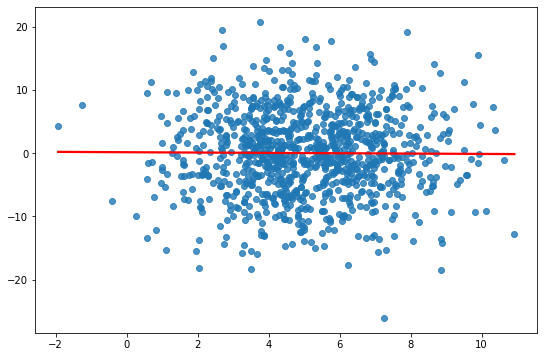

In [5]:
line_kws = {'color':'red'}
sns.regplot(X[:,0], X[:,1], ci=None, line_kws=line_kws);

In [6]:
print('Covariance matrix from numpy\n')
print(np.cov(X, rowvar=False))

print('\n=================================\n')

print('Our covariance matrix\n')
print(covariance(X))

Covariance matrix from numpy

[[ 3.84526748 -0.10400448]
 [-0.10400448 44.52262284]]


Our covariance matrix

[[ 3.84526748 -0.10400448]
 [-0.10400448 44.52262284]]


## Correlation

The covariance tells us whether two variables have a positive or negative relationship, but it doesn't tell us the strength of the relationship because it depends on the scale of both variables. For this reason we have the correlation between two variables which is just the normalized covariance. We obtain the correlation by dividing the covariance by the standard deviation of each variable. 

$$Corr(X,Y) = \frac{Cov(X,Y)}{\sigma_X \sigma_Y}$$

Correlation falls between -1 and 1. Variables with a correlation closer to 1 have a stronger positive linear relationship while variables closer to -1 have a stronger negative linear relationship. Uncorrelated variables have a correlation of 0.

The correlation matrix is expressed as: 

\begin{pmatrix}
corr(x_1,x_1) & \cdots & corr(x_1,x_n) \\
\vdots & \ddots & \vdots \\
corr(x_n,x_1) & \cdots & corr(x_n,x_n)
\end{pmatrix}

Note the diagonal is always 1 because a variable is always perfectly correlated with itself.

In [7]:
def correlation(X):
    cov = covariance(X)
    std_X = X.std(axis=0, ddof=1)
    std = std_X.reshape(-1, 1) @ std_X.reshape(1, -1)
    corr = cov / std
    return corr

### Generating uncorrelated data

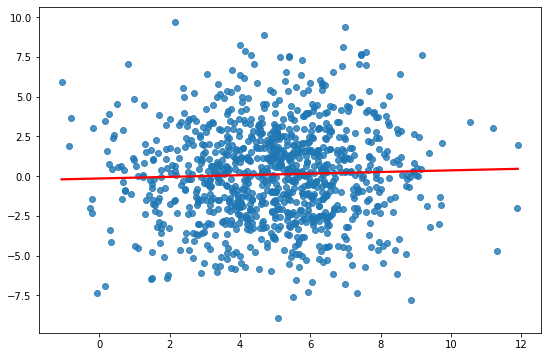

In [8]:
x = np.random.normal(loc=5, scale=2, size=1000)
y = np.random.normal(loc=0, scale=3, size=1000)

X = np.vstack((x, y)).T

sns.regplot(X[:,0], X[:,1], ci=None, line_kws=line_kws);

In [9]:
print('Covariance matrix from numpy\n')
print(np.cov(X, rowvar=False))

print('\n=================================\n')

print('Our covariance matrix\n')

print(covariance(X))

print('\n=================================\n')

print('Correlation matrix from numpy\n')
print(np.corrcoef(X, rowvar=False))

print('\n=================================\n')

print('Our correlation matrix\n')
print(correlation(X))

Covariance matrix from numpy

[[4.08806198 0.20876797]
 [0.20876797 8.92574464]]


Our covariance matrix

[[4.08806198 0.20876797]
 [0.20876797 8.92574464]]


Correlation matrix from numpy

[[1.         0.03456073]
 [0.03456073 1.        ]]


Our correlation matrix

[[1.         0.03456073]
 [0.03456073 1.        ]]


### Generating correlated data

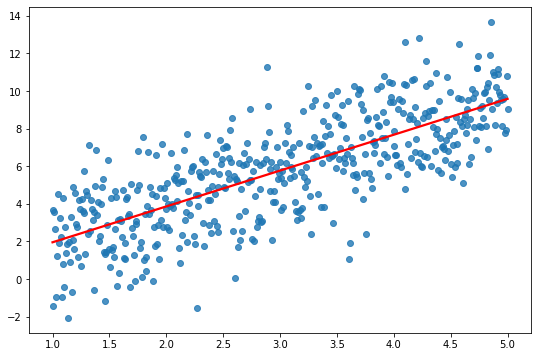

In [10]:
x = np.linspace(1, 5, 500)
y = 2 * x + np.random.normal(scale=2, size=500)
X = np.vstack((x,y)).T

sns.regplot(X[:,0], X[:,1], ci=None, line_kws={'color':'red'});

In [11]:
print('Covariance matrix from numpy\n')
print(np.cov(X, rowvar=False))

print('\n=================================\n')

print('Our covariance matrix\n')

print(covariance(X))

print('\n=================================\n')

print('Correlation matrix from numpy\n')
print(np.corrcoef(X, rowvar=False))

print('\n=================================\n')

print('Our correlation matrix\n')
print(correlation(X))

Covariance matrix from numpy

[[1.34136007 2.55717062]
 [2.55717062 8.41459683]]


Our covariance matrix

[[1.34136007 2.55717062]
 [2.55717062 8.41459683]]


Correlation matrix from numpy

[[1.         0.76115019]
 [0.76115019 1.        ]]


Our correlation matrix

[[1.         0.76115019]
 [0.76115019 1.        ]]


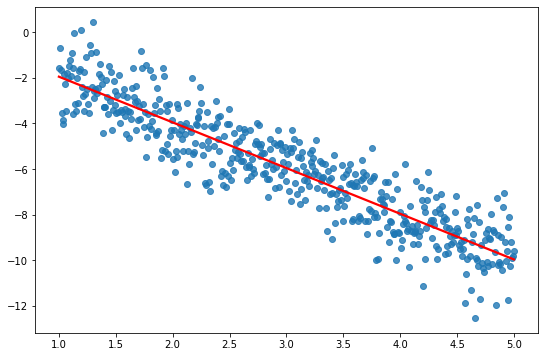

In [12]:
x = np.linspace(1, 5, 500)
y = -2 * x + np.random.normal(scale=1, size=500)
X = np.vstack((x,y)).T

sns.regplot(X[:,0], X[:,1], ci=None, line_kws={'color':'red'});

In [13]:
print('Covariance matrix from numpy\n')
print(np.cov(X, rowvar=False))

print('\n=================================\n')

print('Our covariance matrix\n')

print(covariance(X))

print('\n=================================\n')

print('Correlation matrix from numpy\n')
print(np.corrcoef(X, rowvar=False))

print('\n=================================\n')

print('Our correlation matrix\n')
print(correlation(X))

Covariance matrix from numpy

[[ 1.34136007 -2.68529338]
 [-2.68529338  6.43458417]]


Our covariance matrix

[[ 1.34136007 -2.68529338]
 [-2.68529338  6.43458417]]


Correlation matrix from numpy

[[ 1.         -0.91402655]
 [-0.91402655  1.        ]]


Our correlation matrix

[[ 1.         -0.91402655]
 [-0.91402655  1.        ]]


### Correlation for a 4 feature matrix

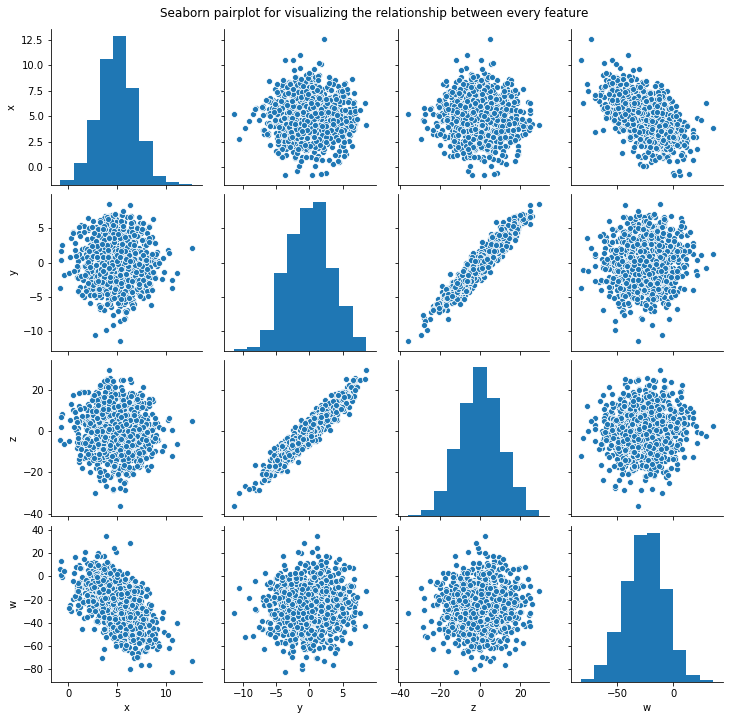

In [14]:
x = np.random.normal(loc=5, scale=2, size=1000)
y = np.random.normal(loc=0, scale=3, size=1000)
z = 3 * y + np.random.normal(scale=3, size=1000)
w = -5 * x + np.random.normal(scale=15, size=1000)

X = np.vstack((x, y, z, w)).T
df_X = pd.DataFrame(X, columns=['x', 'y', 'z', 'w'])

sns.pairplot(df_X)
plt.suptitle('Seaborn pairplot for visualizing the relationship between every feature')
plt.subplots_adjust(top=0.95)

In [15]:
print('Covariance matrix from numpy\n')
print(np.cov(X, rowvar=False))

print('\n=================================\n')

print('Our covariance matrix\n')

print(covariance(X))

print('\n=================================\n')

print('Correlation matrix from numpy\n')
print(np.corrcoef(X, rowvar=False))

print('\n=================================\n')

print('Our correlation matrix\n')
print(correlation(X))

Covariance matrix from numpy

[[ 3.54161511e+00 -2.07022513e-01 -7.83431335e-01 -1.80049304e+01]
 [-2.07022513e-01  1.03896451e+01  3.14939432e+01  3.65036482e+00]
 [-7.83431335e-01  3.14939432e+01  1.04507702e+02  1.19412358e+01]
 [-1.80049304e+01  3.65036482e+00  1.19412358e+01  3.12321447e+02]]


Our covariance matrix

[[ 3.54161511e+00 -2.07022513e-01 -7.83431335e-01 -1.80049304e+01]
 [-2.07022513e-01  1.03896451e+01  3.14939432e+01  3.65036482e+00]
 [-7.83431335e-01  3.14939432e+01  1.04507702e+02  1.19412358e+01]
 [-1.80049304e+01  3.65036482e+00  1.19412358e+01  3.12321447e+02]]


Correlation matrix from numpy

[[ 1.         -0.03412845 -0.04072172 -0.54136461]
 [-0.03412845  1.          0.95576811  0.06408185]
 [-0.04072172  0.95576811  1.          0.06609585]
 [-0.54136461  0.06408185  0.06609585  1.        ]]


Our correlation matrix

[[ 1.         -0.03412845 -0.04072172 -0.54136461]
 [-0.03412845  1.          0.95576811  0.06408185]
 [-0.04072172  0.95576811  1.          0.

## Visualizing the correlation matrix


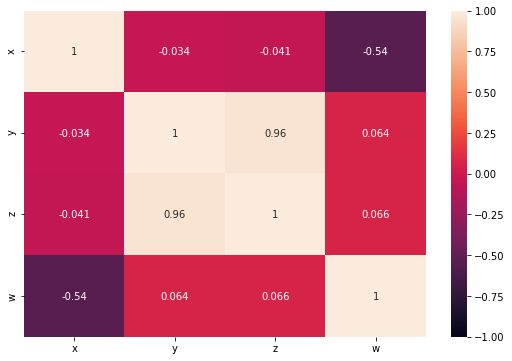

In [16]:
sns.heatmap(df_X.corr(), linewidths=0, vmin=-1, vmax=1, annot=True);